<a href="https://colab.research.google.com/github/falwa-alkhalifah/CodeLand/blob/main/IT362.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('Raw_Dataset.csv')

# Create a DataFrame to show attribute information
attribute_informations = pd.DataFrame({
    'AttributeName' : df.columns,
    'DataType' : df.dtypes.values
})

# Display information about the dataset
print(f"Number of attributes: {len(df.columns)}")
print('\n')
print(f"Number of objects: {len(df)}")
print('\n')
print("Attributes and Their Types:")
print(attribute_informations)

Number of attributes: 13


Number of objects: 5759


Attributes and Their Types:
          AttributeName DataType
0                  name   object
1                 owner   object
2                   url   object
3           description   object
4                 stars   object
5                 forks   object
6            created_at   object
7             pushed_at   object
8      primary_language   object
9   all_languages_bytes   object
10               topics   object
11              license   object
12   contributors_count  float64


In [ ]:
try:
# Check for missing values and duplicates
    print("Missing values per column:")
    print(df.isnull().sum())

    print("\nNumber of duplicate rows:")
    print(df.duplicated().sum())

    # Remove rows with null values only in the 'primary_language' column
    df_cleaned = df.dropna(subset=['primary_language'])

    # Remove duplicate rows from the remaining data
    df_cleaned = df_cleaned.drop_duplicates()

    # Display the new shape of the dataframe to show the changes
    print("Original DataFrame shape:")
    print(df.shape)
    print("\nCleaned DataFrame shape:")
    print(df_cleaned.shape)

    # Save the cleaned dataframe to a new CSV file
    df_cleaned.to_csv('Cleaned_Dataset.csv', index=False)

except FileNotFoundError:
    print("File not found. Please ensure 'Raw_Dataset.csv' is in the correct directory.")

except Exception as e:
    print(f"An error occurred: {e}")

Missing values per column:
name                      0
owner                     1
url                       1
description             115
stars                     1
forks                     1
created_at                1
pushed_at                 1
primary_language        644
all_languages_bytes       1
topics                 1098
license                 221
contributors_count     4759
dtype: int64

Number of duplicate rows:
32
Original DataFrame shape:
(5759, 13)

Cleaned DataFrame shape:
(5088, 13)


Number of attributes: 13
Number of objects: 5759

Attributes and Their Types:
          AttributeName DataType
0                  name   object
1                 owner   object
2                   url   object
3           description   object
4                 stars   object
5                 forks   object
6            created_at   object
7             pushed_at   object
8      primary_language   object
9   all_languages_bytes   object
10               topics   object
11              license   object
12   contributors_count  float64

Missing values per column:
name                      0
owner                     1
url                       1
description             115
stars                     1
forks                     1
created_at                1
pushed_at                 1
primary_language        644
all_languages_bytes       1
topics                 1098
license                 221
contributors_count     4759
dtype: int64

Number of duplicate rows:
32

Original DataFrame shape

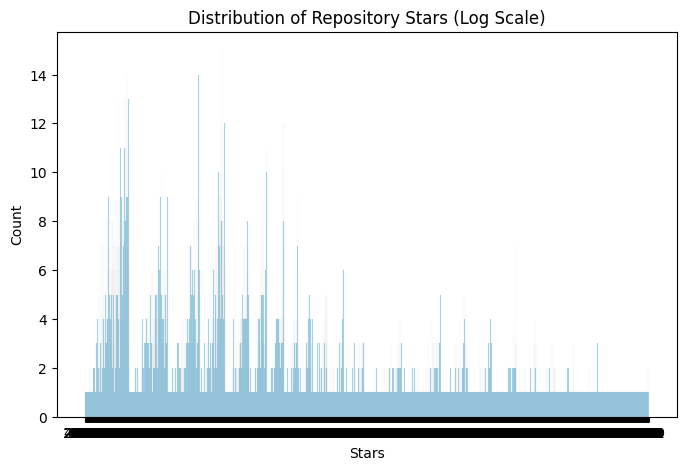

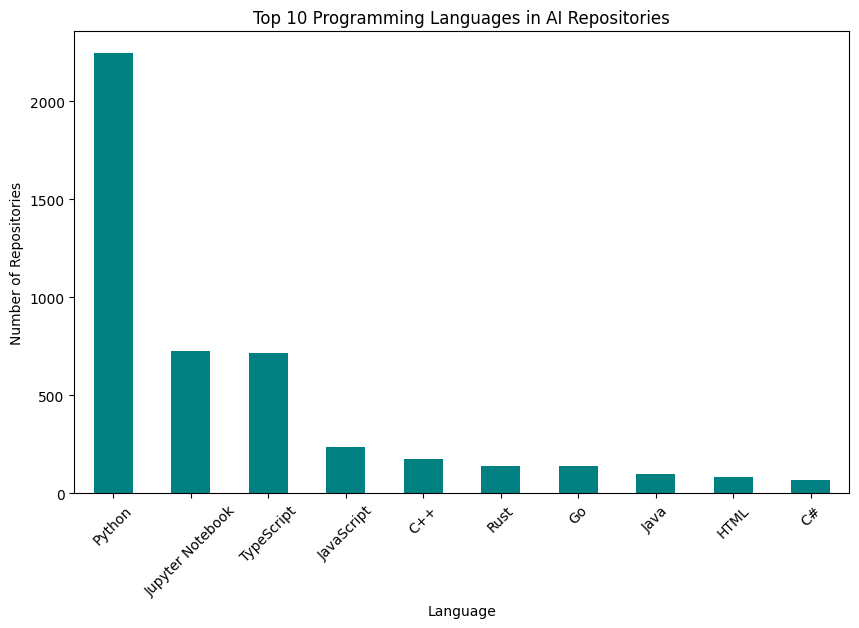

/tmp/ipython-input-2916960440.py:65: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cleaned['created_at'].dt.to_period("M").value_counts().sort_index().plot(kind='line')


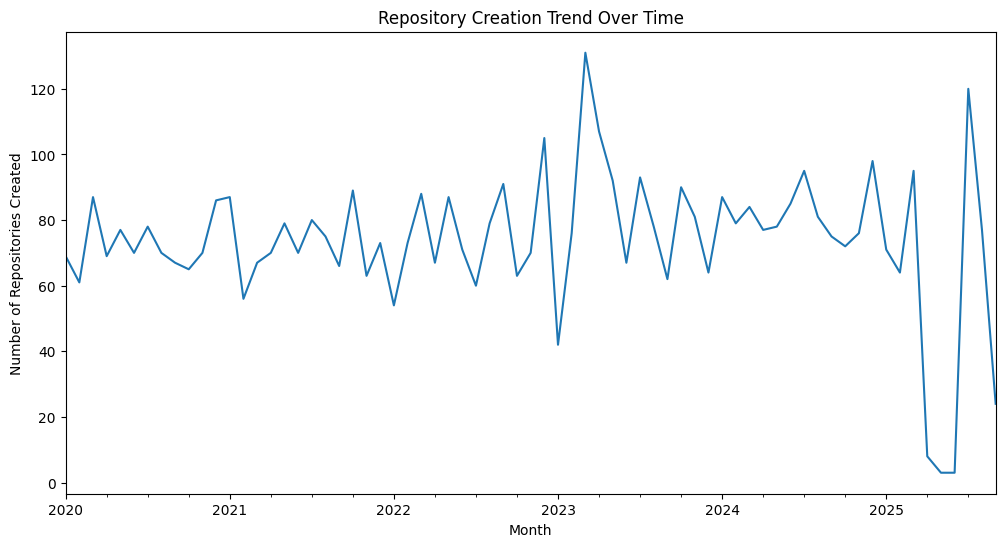

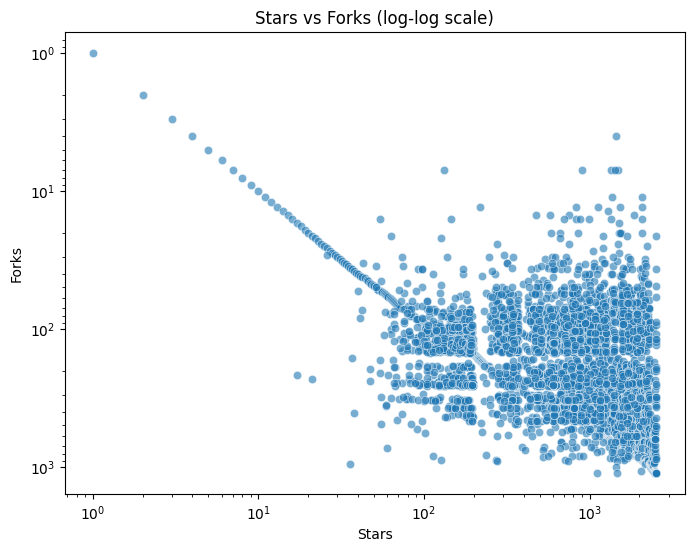

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Raw_Dataset.csv')

# === BASIC INFO ===
attribute_informations = pd.DataFrame({
    'AttributeName' : df.columns,
    'DataType' : df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}")
print(f"Number of objects: {len(df)}")
print("\nAttributes and Their Types:")
print(attribute_informations)

# === DATA QUALITY CHECK ===
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Clean dataset
df_cleaned = df.dropna(subset=['primary_language']).drop_duplicates()

print("\nOriginal DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

df_cleaned.to_csv('Cleaned_Dataset.csv', index=False)


# === DESCRIPTIVE STATISTICS ===
print("\nSummary statistics for numeric columns:")
print(df_cleaned.describe())

print("\nTop 10 most common programming languages:")
print(df_cleaned['primary_language'].value_counts().head(10))


# === VISUALIZATIONS ===
# 1. Distribution of repository stars
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['stars'], bins=50, log_scale=True, color='skyblue')
plt.title("Distribution of Repository Stars (Log Scale)")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

# 2. Top 10 programming languages used
plt.figure(figsize=(10,6))
df_cleaned['primary_language'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Programming Languages in AI Repositories")
plt.xlabel("Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.show()

# 3. Repositories created over time
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'], errors='coerce')
plt.figure(figsize=(12,6))
df_cleaned['created_at'].dt.to_period("M").value_counts().sort_index().plot(kind='line')
plt.title("Repository Creation Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Repositories Created")
plt.show()

# 4. Stars vs Forks scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='stars', y='forks', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Stars vs Forks (log-log scale)")
plt.xlabel("Stars")
plt.ylabel("Forks")
plt.show()
